In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',sep=',',header=None, names =['class', 'L_W', 'L_D', 'R_W', 'R_D'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
class    625 non-null object
L_W      625 non-null int64
L_D      625 non-null int64
R_W      625 non-null int64
R_D      625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [47]:
df.shape

(625, 5)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df.head()

,class,L_W,L_D,R_W,R_D
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [22]:
df['class']=le.fit_transform(df['class'])

In [23]:
df.head()

,class,L_W,L_D,R_W,R_D
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [25]:
dfcorr =df.corr()

<Figure size 720x720 with 0 Axes>

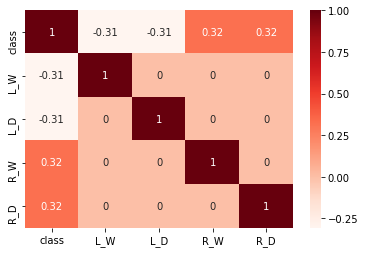

In [29]:
plt.figure (figsize=(10,10))
plt.show()
sns.heatmap(dfcorr, cmap='Reds', annot= True)

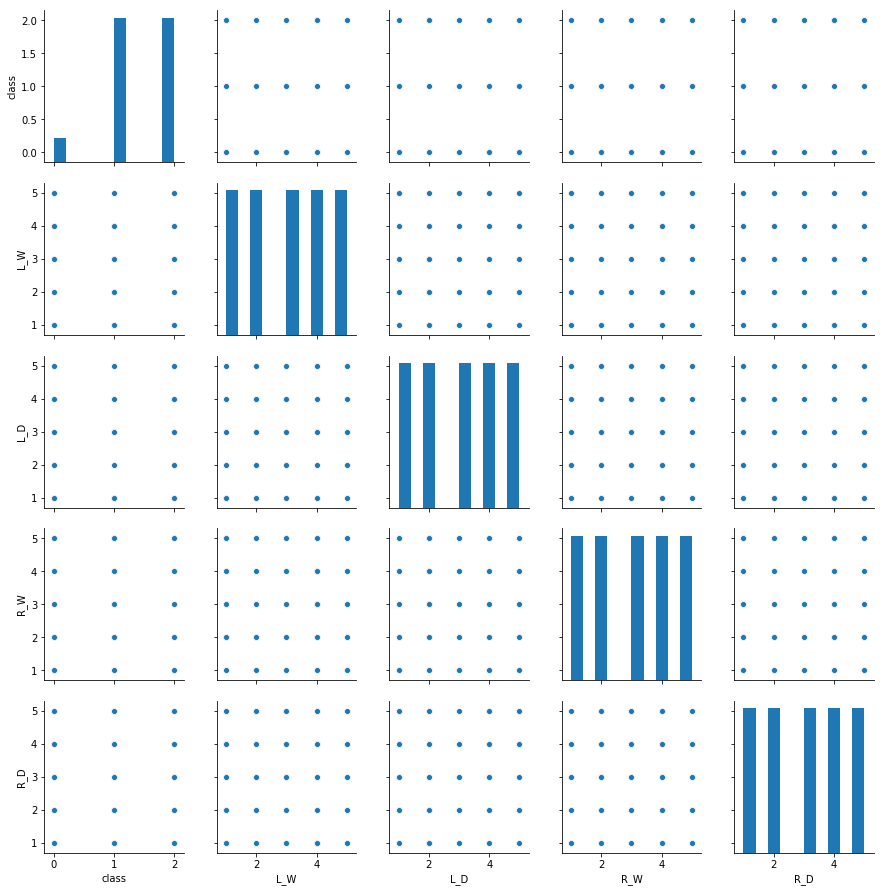

In [30]:
sns.pairplot(data=df)

In [31]:
# no outliers nothing to drop from colomns.

In [39]:
from sklearn.model_selection import train_test_split


In [58]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x, y , test_size=.33, random_state=47)

In [60]:
x.shape

(625, 4)

In [61]:
y.shape

(625,)

In [62]:
y_train.shape

(418,)

In [63]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
mod = [DecisionTreeClassifier(), RandomForestClassifier(),XGBClassifier()]
for i in mod:
    i.fit(x_train,y_train)
    print(i, i.score(x_train,y_train))
    pred = i.predict(x_test)
    print("\n", accuracy_score(y_test, pred))
    print("\n", confusion_matrix(y_test, pred))
    print("\n", classification_report(y_test, pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 1.0

 0.7536231884057971

 [[ 2 12  2]
 [16 70  3]
 [16  2 84]]

               precision    recall  f1-score   support

           0       0.06      0.12      0.08        16
           1       0.83      0.79      0.81        89
           2       0.94      0.82      0.88       102

   micro avg       0.75      0.75      0.75       207
   macro avg       0.61      0.58      0.59       207
weighted avg       0.83      0.75      0.79       207

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split

In [66]:
import pickle
saved_model = pickle.dumps(mod[2])

In [67]:
from_comp = pickle.loads(saved_model)

In [68]:
from_comp.predict(x_test)

array([1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1])